In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/bitcoin.csv")
df

,Date,Price
0,5/23/2019,7881.846680
1,5/24/2019,7987.371582
2,5/25/2019,8052.543945
3,5/26/2019,8673.215820
4,5/27/2019,8805.778320
...,...,...
362,5/19/2020,9729.038086
363,5/20/2020,9522.981445
364,5/21/2020,9081.761719
365,5/22/2020,9182.577148


In [ ]:
df.head()

,Date,Price
0,5/23/2019,7881.846680
1,5/24/2019,7987.371582
2,5/25/2019,8052.543945
3,5/26/2019,8673.215820
4,5/27/2019,8805.778320


In [ ]:
df.tail()

,Date,Price
362,5/19/2020,9729.038086
363,5/20/2020,9522.981445
364,5/21/2020,9081.761719
365,5/22/2020,9182.577148
366,5/23/2020,9180.045898


In [ ]:
df.isna().sum()

Date     0
Price    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    367 non-null    object 
 1   Price   367 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.9+ KB


<Figure size 1008x720 with 0 Axes>

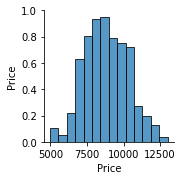

In [ ]:
plt.figure(figsize=(14,10))
sns.pairplot(data=df)
plt.show()

In [ ]:
df.drop(['Date'],axis=1,inplace=True)
df

,Price
0,7881.846680
1,7987.371582
2,8052.543945
3,8673.215820
4,8805.778320
...,...
362,9729.038086
363,9522.981445
364,9081.761719
365,9182.577148


In [ ]:
pday = 31
df['prediction']=df[['Price']].shift(-pday)
df

,Price,prediction
0,7881.846680,10855.37109
1,7987.371582,11011.10254
2,8052.543945,11790.91699
3,8673.215820,13016.23145
4,8805.778320,11182.80664
...,...,...
362,9729.038086,NaN
363,9522.981445,NaN
364,9081.761719,NaN
365,9182.577148,NaN


In [ ]:
df.tail()

,Price,prediction
362,9729.038086,NaN
363,9522.981445,NaN
364,9081.761719,NaN
365,9182.577148,NaN
366,9180.045898,NaN


In [ ]:
x=np.array(df.drop(['prediction'],axis =1))
x=x[:len(df)-pday]
x

array([[ 7881.84668 ],
       [ 7987.371582],
       [ 8052.543945],
       [ 8673.21582 ],
       [ 8805.77832 ],
       [ 8719.961914],
       [ 8659.487305],
       [ 8319.472656],
       [ 8574.501953],
       [ 8564.016602],
       [ 8742.958008],
       [ 8208.995117],
       [ 7707.770996],
       [ 7824.231445],
       [ 7822.023438],
       [ 8043.951172],
       [ 7954.12793 ],
       [ 7688.077148],
       [ 8000.32959 ],
       [ 7927.714355],
       [ 8145.857422],
       [ 8230.923828],
       [ 8693.833008],
       [ 8838.375   ],
       [ 8994.488281],
       [ 9320.352539],
       [ 9081.762695],
       [ 9273.521484],
       [ 9527.160156],
       [10144.55664 ],
       [10701.69141 ],
       [10855.37109 ],
       [11011.10254 ],
       [11790.91699 ],
       [13016.23145 ],
       [11182.80664 ],
       [12407.33203 ],
       [11959.37109 ],
       [10817.15527 ],
       [10583.13477 ],
       [10801.67773 ],
       [11961.26953 ],
       [11215.4375  ],
       [109

In [ ]:
y=np.array(df['prediction'])
y=y[:-pday]
y

array([10855.37109 , 11011.10254 , 11790.91699 , 13016.23145 ,
       11182.80664 , 12407.33203 , 11959.37109 , 10817.15527 ,
       10583.13477 , 10801.67773 , 11961.26953 , 11215.4375  ,
       10978.45996 , 11208.55078 , 11450.84668 , 12285.95801 ,
       12573.8125  , 12156.5127  , 11358.66211 , 11815.98633 ,
       11392.37891 , 10256.05859 , 10895.08984 ,  9477.641602,
        9693.802734, 10666.48242 , 10530.73242 , 10767.13965 ,
       10599.10547 , 10343.10645 ,  9900.767578,  9811.925781,
        9911.841797,  9870.303711,  9477.677734,  9552.860352,
        9519.145508,  9607.423828, 10085.62793 , 10399.66895 ,
       10518.17481 , 10821.72656 , 10970.18457 , 11805.65332 ,
       11478.16895 , 11941.96875 , 11966.40723 , 11862.93652 ,
       11354.02441 , 11523.5791  , 11382.61621 , 10895.83008 ,
       10051.7041  , 10311.5459  , 10374.33887 , 10231.74414 ,
       10345.81055 , 10916.05371 , 10763.23242 , 10138.04981 ,
       10131.05566 , 10407.96484 , 10159.96094 , 10138.

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=2)
pd_array=np.array(df.drop(['prediction'],axis=1))[:31]
pd_array

array([[ 7881.84668 ],
       [ 7987.371582],
       [ 8052.543945],
       [ 8673.21582 ],
       [ 8805.77832 ],
       [ 8719.961914],
       [ 8659.487305],
       [ 8319.472656],
       [ 8574.501953],
       [ 8564.016602],
       [ 8742.958008],
       [ 8208.995117],
       [ 7707.770996],
       [ 7824.231445],
       [ 7822.023438],
       [ 8043.951172],
       [ 7954.12793 ],
       [ 7688.077148],
       [ 8000.32959 ],
       [ 7927.714355],
       [ 8145.857422],
       [ 8230.923828],
       [ 8693.833008],
       [ 8838.375   ],
       [ 8994.488281],
       [ 9320.352539],
       [ 9081.762695],
       [ 9273.521484],
       [ 9527.160156],
       [10144.55664 ],
       [10701.69141 ]])

In [ ]:
from sklearn.svm import SVR
rbf=SVR(kernel='rbf', C=1e3, gamma=0.00001)
rbf.fit(xtrain,ytrain)

SVR(C=1000.0, gamma=1e-05)

In [ ]:
ypred=rbf.predict(xtest)
ypred


array([ 8192.68472846,  8394.09790238,  7369.81300927,  9095.76431084,
        8409.47221331,  8384.46510418,  9200.08780352,  9418.33676949,
        9399.931077  ,  8120.0289368 ,  8210.48215429,  8498.55306989,
        9199.82415879,  9384.01519834,  8642.83029044,  8360.46251757,
        9424.60265631,  8381.06252515,  7957.9066053 ,  9286.17102072,
        7373.11879255, 10107.09648525,  9076.72703499,  8532.58736185,
        8704.24392319,  8259.45785205,  8700.51987179,  8933.0962491 ,
        8904.67185472,  8913.79929938,  9222.38598162,  8228.64120208,
       10251.93540835,  7816.66292128,  8595.29990347,  7786.05199406,
        8369.15389203,  9246.96270491,  8231.95043282,  8245.21210878,
        8356.90801522,  8179.95206842,  8368.30839932,  9077.79815736,
        7501.01763913,  8329.99806907,  7411.01752626, 10930.27523917,
        8522.90442279,  9080.81508635,  8338.07740311,  8790.02204398,
        8008.4035956 ,  8662.60263294,  8002.32750099,  7768.05959887,
      

In [ ]:
next30=rbf.predict(pd_array)
next30

array([ 8952.77943964,  9359.38372038,  9425.2677042 ,  8700.51987179,
        8014.40330924,  8460.34972772,  8766.4404633 ,  9200.08780352,
        9090.64529823,  9118.37118648,  8338.07740311,  9265.25856721,
        7816.66292128,  8595.29990347,  8580.41822052,  9423.72593653,
        9272.14235069,  7707.68764805,  9383.10084659,  9175.37512053,
        9350.09741267,  9240.89299242,  8596.93254982,  7862.42169167,
        7371.37725653,  7768.05959887,  7271.51889762,  7585.65690956,
        8400.73965237,  8231.95043282, 10107.09648525])

In [ ]:
print(next30)
print()
print(df.tail(pday))

[ 8952.77943964  9359.38372038  9425.2677042   8700.51987179
  8014.40330924  8460.34972772  8766.4404633   9200.08780352
  9090.64529823  9118.37118648  8338.07740311  9265.25856721
  7816.66292128  8595.29990347  8580.41822052  9423.72593653
  9272.14235069  7707.68764805  9383.10084659  9175.37512053
  9350.09741267  9240.89299242  8596.93254982  7862.42169167
  7371.37725653  7768.05959887  7271.51889762  7585.65690956
  8400.73965237  8231.95043282 10107.09648525]

           Price  prediction
336  7429.724609         NaN
337  7550.900879         NaN
338  7569.936035         NaN
339  7679.867188         NaN
340  7795.601074         NaN
341  7807.058594         NaN
342  8801.038086         NaN
343  8658.553711         NaN
344  8864.766602         NaN
345  8988.596680         NaN
346  8897.468750         NaN
347  8912.654297         NaN
348  9003.070313         NaN
349  9268.761719         NaN
350  9951.518555         NaN
351  9842.666016         NaN
352  9593.896484         NaN
353